In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
plt.style.use("default")
plt.rcParams["savefig.dpi"] = 100
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Liberation Sans"]
plt.rcParams["mathtext.fontset"] = "custom"

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def betterstep(bins, y, **kwargs):
    """A 'better' version of matplotlib's step function
    
    Given a set of bin edges and bin heights, this plots the thing
    that I wish matplotlib's ``step`` command plotted. All extra
    arguments are passed directly to matplotlib's ``plot`` command.
    
    Args:
        bins: The bin edges. This should be one element longer than
            the bin heights array ``y``.
        y: The bin heights.
        ax (Optional): The axis where this should be plotted.
    
    """
    new_x = [a for row in zip(bins[:-1], bins[1:]) for a in row]
    new_y = [a for row in zip(y, y) for a in row]
    ax = kwargs.pop("ax", plt.gca())
    return ax.plot(new_x, new_y, **kwargs)

7
0.14


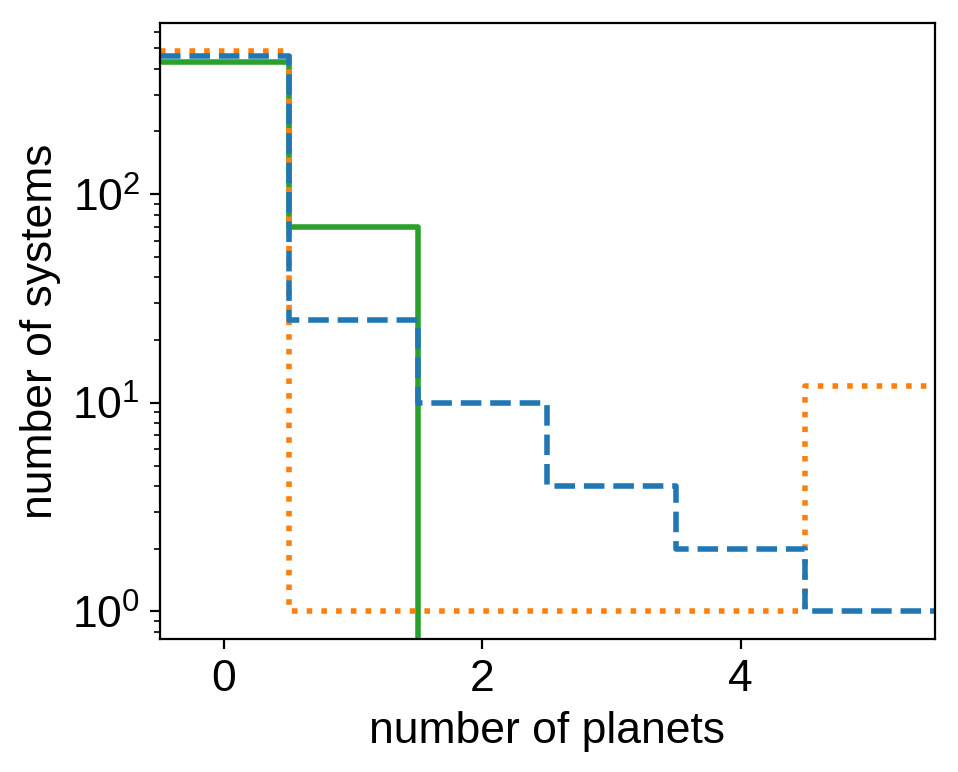

In [4]:
plt.figure(figsize=(5, 4))

K = 500

alpha = np.array([
    25, 10, 4, 2, 1
])
nums = np.arange(1, len(alpha)+1)
num_expect = np.sum(alpha * nums)
bins = np.arange(-0.5, len(alpha)+1.5, 1)
print(len(bins))

print(num_expect / K)
alpha0 = np.concatenate(([K - np.sum(alpha)], alpha))

alpha1 = np.ones_like(alpha0)
alpha1[-1] = (num_expect - np.sum(nums[:-1] * alpha1[1:-1])) / nums[-1]
alpha1[0] = K - np.sum(alpha1[1:])

alpha2 = np.zeros_like(alpha0)
alpha2[1] = num_expect
alpha2[0] = K - np.sum(alpha2[1:])

betterstep(bins, alpha2, color="C2", lw=2)
betterstep(bins, alpha1, color="C1", lw=2, ls="dotted")
betterstep(bins, alpha0, color="C0", lw=2, ls="dashed")

plt.yscale("log")
plt.xlim(bins[0], bins[-1])
plt.xlabel("number of planets")
plt.ylabel("number of systems")

plt.savefig("expect1.pdf", bbox_inches="tight")

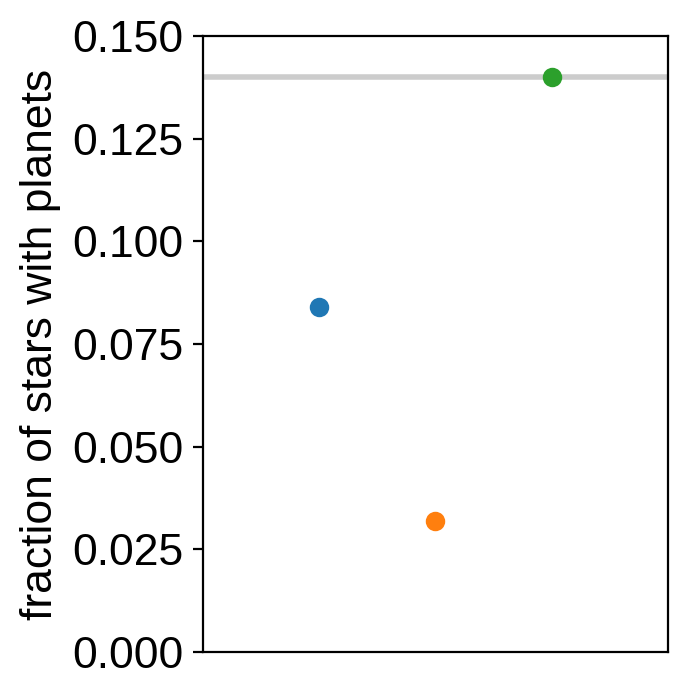

In [5]:
plt.figure(figsize=(3, 4))

plt.axhline(num_expect / K, color="k", lw=2, alpha=0.2)

plt.plot(0, 1 - alpha0[0] / K, "o")
plt.plot(1, 1 - alpha1[0] / K, "o")
plt.plot(2, 1 - alpha2[0] / K, "o")

plt.ylim(0, 0.15)
plt.xticks([])
plt.xlim(-1, 3)

plt.ylabel("fraction of stars with planets")
plt.savefig("expect2.pdf", bbox_inches="tight")